For this exercise, you will analyze a dataset from Amazon. The data format and a
sample entry are shown on the next page.

A. (Suggested duration: 90 mins)
With the given data for 548552 products, perform exploratory analysis and make
suggestions for further analysis on the following aspects.


B. (Suggested duration: 30 mins)
Give the number crunching a rest! Just think about these problems.


In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
from collections import Counter

%matplotlib inline 

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns


from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [43]:
import re
amazon_stats = []

pattern ="reviews:"
with open("amazon-meta.txt", 'r') as f:
    for line in f:
        if pattern in line:
            _, value = line.split(':', 1)
            numbers = re.findall(r': [0-9]+', value)
            numbers_clean = [float(x[1:].strip()) for x in numbers]
            ratings = {'total': numbers_clean[0],
                      'downloaded': numbers_clean[1],
                      'avg_rating': numbers_clean[2],}
            amazon_stats.append(ratings)

In [44]:
amazon_data =pd.DataFrame(amazon_stats)
amazon_data.head()

,avg_rating,downloaded,total
0,5.0,2.0,2.0
1,4.0,12.0,12.0
2,5.0,1.0,1.0
3,4.0,1.0,1.0
4,0.0,0.0,0.0


In [45]:
amazon_data.describe()

,avg_rating,downloaded,total
count,542684.000000,542684.000000,542684.000000
mean,3.075602,13.992017,14.339818
std,1.944418,71.908413,74.768369
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000
75%,5.000000,7.000000,8.000000
max,5.000000,4995.000000,5545.000000


In [46]:
m = ols('avg_rating ~ downloaded',amazon_data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3862.
Date:                Tue, 22 Aug 2017   Prob (F-statistic):               0.00
Time:                        17:41:01   Log-Likelihood:            -1.1290e+06
No. Observations:              542684   AIC:                         2.258e+06
Df Residuals:                  542682   BIC:                         2.258e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0438      0.003   1135.977      0.0

**1. Trustworthiness of ratings
Ratings are susceptible to manipulation, bias etc. What can you say (quantitatively
speaking) about the ratings in this dataset?**

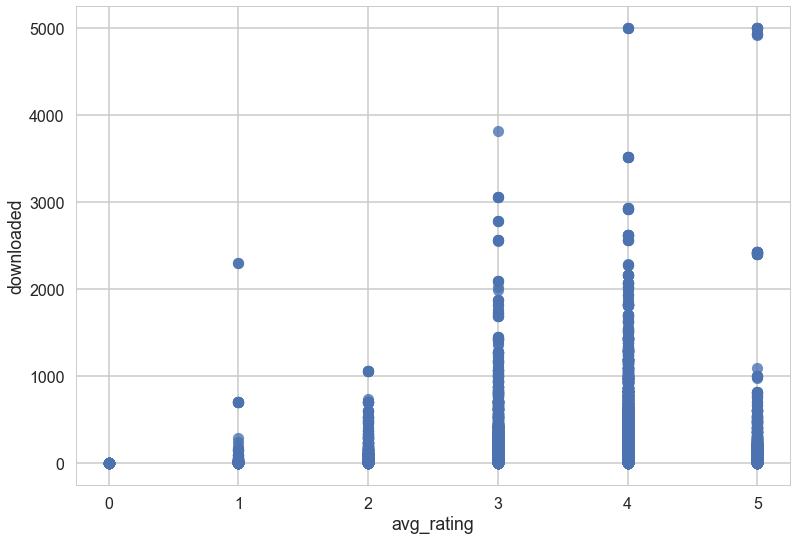

In [47]:
sns.regplot(y="downloaded", x="avg_rating", data=amazon_data, fit_reg = False)

In [48]:
df2 = 'amazon-meta.txt'

**1. Algorithm thinking
How would build the product categorization from scratch, using similar/co-purchased
information?**

In [49]:
items = []

with open(df2) as f:
    info = set()
    categories = False
    item_count = 0
    for i, line in enumerate(f):
        
        if categories:
            if ':' in line:
                # the end of categories
                categories = False
                continue
            set_ = set([l.strip().split('[', 1)[0]
                     for l in line.strip().split('|') if len(l.strip().split('[', 1)[0]) > 1])
            info = info.union(set_)
        
        elif 'categories:' in line:
            categories = True
        
        # the end of the item
        elif len(line.strip()) == 0:
            # Only save the categories if at least 1 was found
            if len(info) > 0:
                items.append(info)
                
            info = set()
            
            item_count += 1
            if item_count > 100:
                break


2) Category bloat
Consider the product group named 'Books'. Each product in this group is associated with
categories. Naturally, with categorization, there are tradeoffs between how broad or
specific the categories must be.

**For this dataset, quantify the following:**

**a. Is there redundancy in the categorization? How can it be identified/removed?**

**b. Is is possible to reduce the number of categories drastically (say to 10% of existing
categories) by sacrificing relatively few category entries (say close to 10%)?**

In [50]:
items[:3]

[{'Books',
  'Christianity',
  'Clergy',
  'Preaching',
  'Religion & Spirituality',
  'Sermons',
  'Subjects'},
 {'Books',
  'Earth-Based Religions',
  'Religion & Spirituality',
  'Subjects',
  'Wicca',
  'Witchcraft'},
 {'Books', 'Crafts & Hobbies', 'General', 'Home & Garden', 'Subjects'}]

In [51]:
all_combo = [
    tuple(sorted(combo)) 
    for item in items
    for combo in list(combinations(item, 1))
]

In [52]:
all_combo[:10]

[('Preaching',),
 ('Christianity',),
 ('Subjects',),
 ('Clergy',),
 ('Religion & Spirituality',),
 ('Sermons',),
 ('Books',),
 ('Wicca',),
 ('Witchcraft',),
 ('Earth-Based Religions',)]

In [53]:
all_combos = [
    tuple(sorted(combo))  
    for item in items
    for combo in list(combinations(item, 2))
]

In [54]:
all_combos[:10]

[('Christianity', 'Preaching'),
 ('Preaching', 'Subjects'),
 ('Clergy', 'Preaching'),
 ('Preaching', 'Religion & Spirituality'),
 ('Preaching', 'Sermons'),
 ('Books', 'Preaching'),
 ('Christianity', 'Subjects'),
 ('Christianity', 'Clergy'),
 ('Christianity', 'Religion & Spirituality'),
 ('Christianity', 'Sermons')]

In [55]:
Counter(all_combos).most_common()[:20]

[(('Books', 'Subjects'), 80),
 (('Books', 'General'), 63),
 (('General', 'Subjects'), 62),
 (('Amazon.com Stores', 'General'), 14),
 (('Books', "Children's Books"), 14),
 (("Children's Books", 'Subjects'), 13),
 (('Books', 'Literature & Fiction'), 13),
 (('General', 'Literature & Fiction'), 13),
 (('General', 'Specialty Stores'), 12),
 (('Literature & Fiction', 'Subjects'), 12),
 (('Amazon.com Stores', 'Books'), 11),
 (('Religion & Spirituality', 'Subjects'), 11),
 (('Books', 'Religion & Spirituality'), 11),
 (('Amazon.com Stores', 'Subjects'), 11),
 (('Books', 'Nonfiction'), 10),
 (('Nonfiction', 'Subjects'), 10),
 (("Children's Books", 'Literature'), 9),
 (('Literature', 'Subjects'), 9),
 (('Christianity', 'Subjects'), 9),
 (('Books', 'Home & Office'), 9)]

**2. Product thinking
Now, put on your 'product thinking' hat.**

**a. Is it a good idea to show users the categorization hierarchy for items?**
Having a hierarchical organization allows a company to focus on the level of specificity that best suits a given situation. 

**b. Is it a good idea to show users similar/co-purchased items?**
It is a good idea to show customers similar/co-purchased items as this may entice customers to make additional purchases that they may not have originally intended to make.

**c. Is it a good idea to show users reviews and ratings for items?**
Showing consumer product ratings can increase consumer confidence in the product, and lead to more purchases

